In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [184]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [185]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [186]:
df.dropna(inplace=True)

In [187]:
for name in df.columns.tolist():
    print(name +":")
    print(df[name].unique(), "num features=" + str(len(df[name].unique())))
    print(df[name].dtype)

customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] num features=7043
object
gender:
['Female' 'Male'] num features=2
object
SeniorCitizen:
[0 1] num features=2
int64
Partner:
['Yes' 'No'] num features=2
object
Dependents:
['No' 'Yes'] num features=2
object
tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] num features=73
int64
PhoneService:
['No' 'Yes'] num features=2
object
MultipleLines:
['No phone service' 'No' 'Yes'] num features=3
object
InternetService:
['DSL' 'Fiber optic' 'No'] num features=3
object
OnlineSecurity:
['No' 'Yes' 'No internet service'] num features=3
object
OnlineBackup:
['Yes' 'No' 'No internet service'] num features=3
object
DeviceProtection:
['No' 'Yes' 'No internet service'] num features=3
object
TechSupport:
['No' 'Yes' 'No internet se

In [188]:
df.drop(labels="customerID",axis=1,inplace=True)

In [195]:
y = df.loc[:,"Churn"]
y = pd.get_dummies(y, drop_first=True)

<AxesSubplot:xlabel='Churn', ylabel='count'>

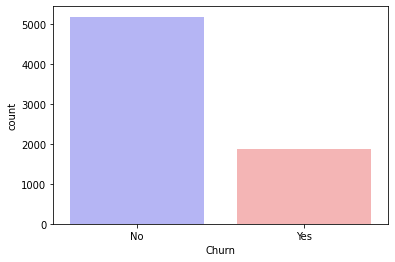

In [217]:
sns.countplot(x="Churn", data=df, palette="bwr")

In [197]:
x = df.drop("Churn", axis=1).copy()

In [199]:
obj_list =[]
for name, column in x.iteritems():
    if column.dtype == "object":
        obj_list.append(name)
        print(name)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges


In [200]:
x_encode = pd.get_dummies(x, columns=obj_list, dtype="float64")

In [201]:
from sklearn.model_selection import train_test_split

In [212]:
x_train,x_test, y_train, y_test = train_test_split(x_encode , y, test_size=.33)

In [213]:
x_train.shape

(4718, 6575)

In [214]:
x_test.shape

(2325, 6575)